In [1]:
from xbbg import blp
import pdblp
import workdays
import datetime
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 70)
# https://data.bloomberglp.com/labs/sites/2/2013/12/blpapi-developers-guide-1.38.pdf
# https://data.bloomberglp.com/professional/sites/10/2017/03/BLPAPI-Core-Developer-Guide.pdf

def Plot(title="",c="" ,l="",axhline="",m="", ymin=None, ymax=None):
    fig, ax = plt.subplots(figsize=(6.5, 2))
    ax.plot(df["Date"], df[c], label=l, marker=m)
    ax.set_title(title, fontsize=10)
    if axhline != "":
        ax.axhline(y=axhline, color='gray', linestyle='--', linewidth=0.5)
    if l != "":
        ax.legend(loc='best')
    if ymin is not None and ymax is not None:
        ax.set_ylim(ymin, ymax)
    plt.tight_layout()
    plt.show()
    
def Plot2(title,c1,c2,l1="",l2="",m1="",m2="",axhline="",color2='tab:orange'): #Two-axis graph  
    fig, ax = plt.subplots(figsize=(6.5, 2))
    l1 = l1 or c1  # l1 = c1 if l1 == "" else l1
    l2 = l2 or c2
    ax.plot(df["Date"], df[c1], marker=m1, label=l1)
    ax.plot(df["Date"], df[c2], marker=m2, label=l2, color=color2)
    if axhline != "":
        ax.axhline(y=axhline, color='gray', linestyle='--', linewidth=0.5)
    ax.set_title(title, fontsize=10)
    ax.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
def PlotTW(title,c1,c2,l1="",l2=""): #Two-axis graph
    fig, ax = plt.subplots(figsize=(10, 2.3))
    l1 = l1 or c1  # l1 = c1 if l1 == "" else l1
    l2 = l2 or c2
    
    line1, = ax.plot(df["Date"], df[c1], label=l1)  # line1オブジェクトを取得
    ax.set_ylabel(l1)

    ax2 = ax.twinx()
    line2, = ax2.plot(df["Date"], df[c2], label=l2, color='lightsteelblue')  # line2オブジェクトを取得
    ax2.set_ylabel(l2)
    
    ax.set_title(title, fontsize=10)
    ax.legend(handles=[line1, line2], labels=[l1, l2], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

    plt.tight_layout()
    plt.show()

In [2]:
L0 = ['ES','NQ','RTY','VG','TP','JGS','NZ','IFB','FFD','XU','TWT']
# L0 = ['ES','NQ','RTY']
L1 = ['SPY US','VOO US','IVV US','QQQ US','AAPL US','1306 JP']
L = L0 + [x.split()[0] for x in L1] 

T = [x + 'A Index' for x in L0 ] + [x + ' Equity' for x in L1 ]
df_BDP = blp.bdp(tickers=T, flds=['name','currency','exch_code','undl_spot_ticker','beta_override_rel_index','volume_avg_3m','fund_total_assets']).loc[T,:]


tmp = ['undl_spot_ticker']
df_BDP[tmp] = df_BDP[tmp].fillna('-')

tmp = ['volume_avg_3m','fund_total_assets']
df_BDP[tmp] = df_BDP[tmp].fillna(0).apply(lambda x: x.map("{:,.0f}".format))
display(df_BDP)


T = [x + '1 Index' for x in L0 ] + [x + ' Equity' for x in L1 ]
d_from = workdays.workday(datetime.datetime.today(), days=-260*2).strftime("%Y%m%d")
d_to = workdays.workday(datetime.datetime.today(), days=-1).strftime("%Y%m%d")
df = blp.bdh(T, ["px_last","px_volume"], d_from, d_to, Calendar="5D", Fill="P").reset_index()
df = df[[df.columns[0][0]]+T]
df.columns = ["Date"] + [ l + x for l in L for x in ["_last","_volume"]]
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,name,currency,exch_code,undl_spot_ticker,beta_override_rel_index,volume_avg_3m,fund_total_assets
ESA Index,S&P500 EMINI FUT Dec24,USD,CME,SPX,INDU Index,"1,047,301",0
NQA Index,NASDAQ 100 E-MINI Dec24,USD,CME,NDX,INDU Index,"380,155",0
RTYA Index,E-Mini Russ 2000 Dec24,USD,CME,RTY,INDU Index,"128,280",0
VGA Index,EURO STOXX 50 Dec24,EUR,EUX,SX5E,INDU Index,"523,224",0
TPA Index,TOPIX INDX FUTR Dec24,JPY,OSE,TPX,INDU Index,"44,730",0
JGSA Index,IFSC NIFTY 50 FUT Nov24,USD,NGC,NIFTY,INDU Index,0,0
NZA Index,Nifty 50 Nov24,INR,NSE,NIFTY,INDU Index,0,0
IFBA Index,CSI 300 IDX FUTUR Dec24,CNY,CFF,SHSN300,INDU Index,"71,887",0
FFDA Index,CSI500 IDX Future Dec24,CNY,CFF,SH000905,INDU Index,"53,840",0
XUA Index,FTSE CHINA A50 Nov24,USD,SGX,XIN9I,INDU Index,"137,255",0


,Date,ES_last,ES_volume,NQ_last,NQ_volume,RTY_last,RTY_volume,VG_last,VG_volume,TP_last,TP_volume,JGS_last,JGS_volume,NZ_last,NZ_volume,IFB_last,IFB_volume,FFD_last,FFD_volume,XU_last,XU_volume,TWT_last,TWT_volume,SPY_last,SPY_volume,VOO_last,VOO_volume,IVV_last,IVV_volume,QQQ_last,QQQ_volume,AAPL_last,AAPL_volume,1306_last,1306_volume
0,2022-11-24,4389.05,1281153.0,13077.71,474645.0,2018.81,156991.0,4008.07,546710.0,1930.6,78621.0,21328.38,5329.0,21185.36,190026.0,3680.15,70279.0,5447.54,55072.0,11917.0,412577.0,1267.09,76175.0,402.42,68261628.0,369.84,2590859.0,404.12,2267636.0,288.82,46389967.0,151.07,58301395.0,2103.0,1653440.0
1,2022-11-25,4388.51,608795.0,12989.52,252366.0,2022.92,79453.0,4006.05,623996.0,1932.0,42513.0,21355.84,5493.0,21208.05,125828.0,3701.07,77374.0,5422.33,55320.0,12010.2,693347.0,1262.71,75379.0,402.33,30545434.0,369.80,1423444.0,404.09,1202538.0,286.92,15498797.0,148.11,35195860.0,2104.5,1165630.0
2,2022-11-28,4320.76,1481503.0,12805.97,506250.0,1982.46,168217.0,3982.78,716327.0,1917.6,49381.0,21423.94,5587.0,21262.65,122999.0,3648.09,90494.0,5382.72,66009.0,11864.0,615065.0,1243.72,81738.0,395.91,68021749.0,363.95,3557001.0,397.69,2508442.0,282.71,38877045.0,144.22,69346522.0,2089.0,739920.0
3,2022-11-29,4311.78,1500171.0,12705.10,555859.0,1987.87,147074.0,3978.74,720500.0,1905.7,56786.0,21373.58,5057.0,21307.57,113058.0,3767.15,96666.0,5484.84,71557.0,12399.4,481534.0,1258.86,49263.0,395.23,52310039.0,363.31,2507770.0,397.01,4447838.0,280.57,35618878.0,141.17,83763803.0,2076.5,929840.0
4,2022-11-30,4441.56,2479997.0,13275.60,769082.0,2041.63,262405.0,4010.09,1120711.0,1903.3,80628.0,21532.65,5429.0,21467.83,137806.0,3766.37,66145.0,5458.73,49401.0,12471.1,315258.0,1270.34,51619.0,407.68,144566653.0,374.49,4748832.0,409.32,6014823.0,293.36,74718088.0,148.03,111380880.0,2066.5,1878110.0


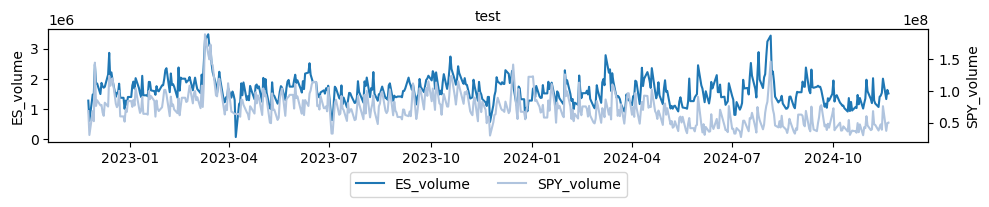

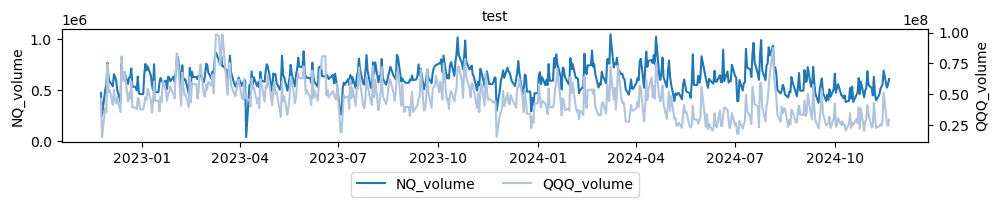

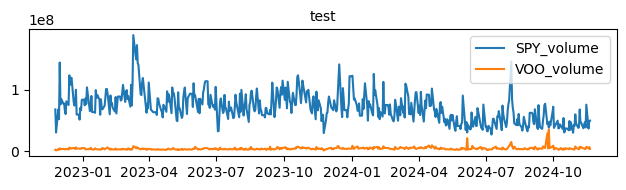

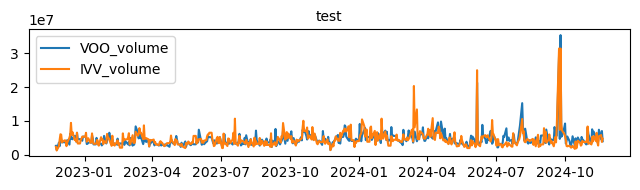

In [3]:
PlotTW('test','ES_volume','SPY_volume')
PlotTW('test','NQ_volume','QQQ_volume')
Plot2('test','SPY_volume','VOO_volume')
Plot2('test','VOO_volume','IVV_volume')

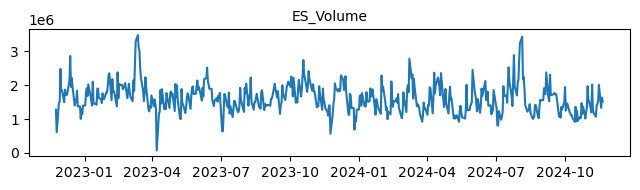

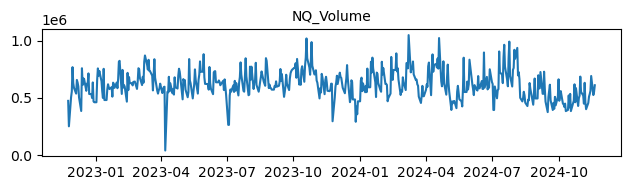

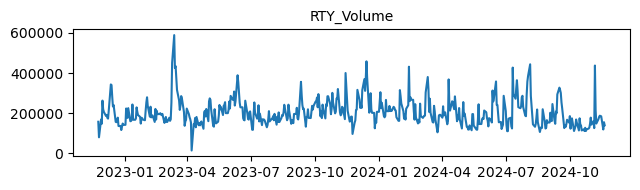

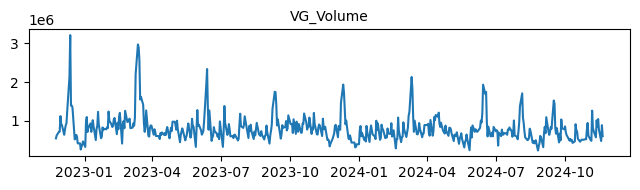

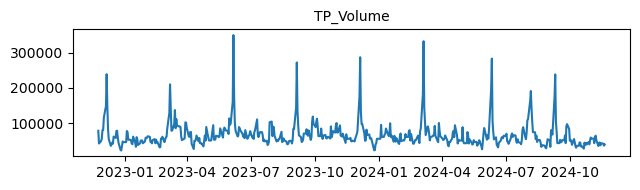

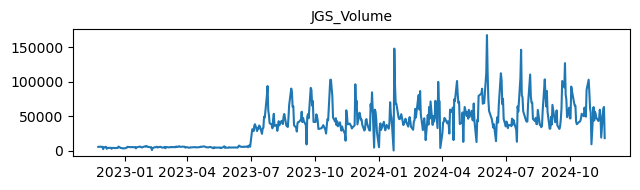

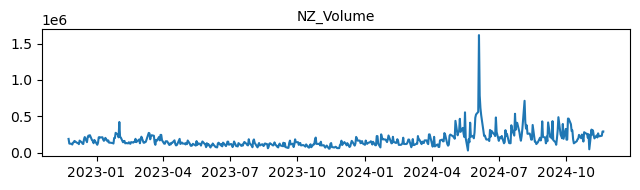

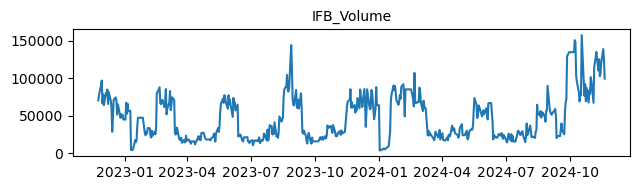

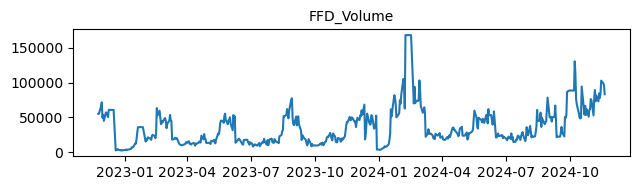

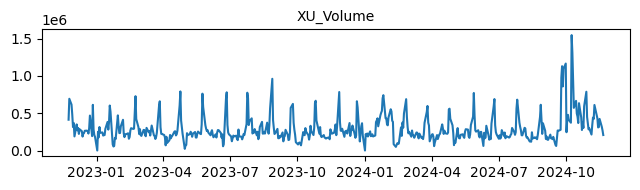

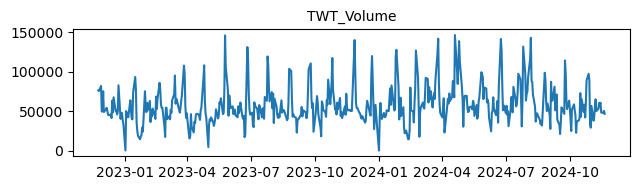

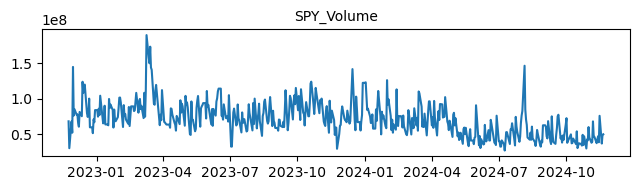

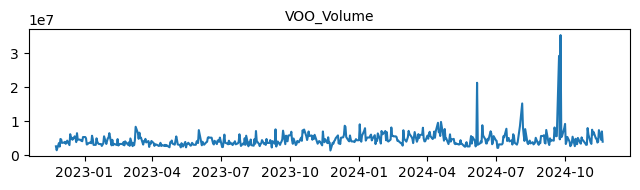

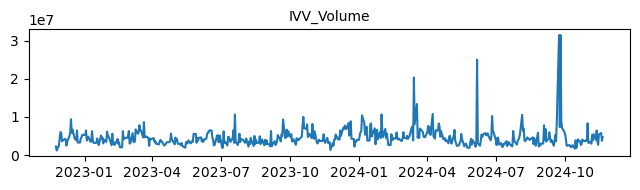

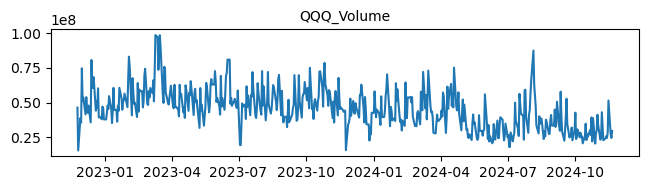

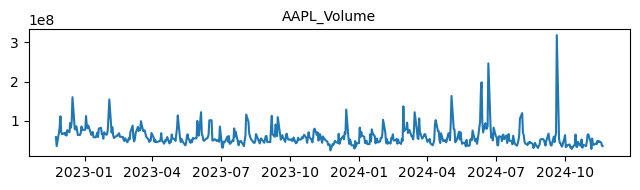

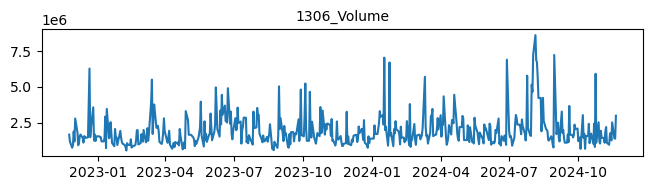

In [4]:
for i in L:
    Plot(i+"_Volume",i+"_volume")